<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/Keras_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 9 - Redes Neuronales en Tensorflow.


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Red Neuronal Multicapa para MNIST.

Hoy trabajaremos nuevamente sobre el conocidísimo dataset MNIST. Este dataset contiene 20.000 muestras de imagenes de 28x28 píxeles (784 píxeles), que nosotros trataremos como variables independientes. Es decir, trabajaremos con un dataset de dimensiones 20.000x784. Cada una de las variables de entrada contiene un valor entero que varía de 0 a 255 indicando la intensidad en escala de grises del pixel correspondiente.

El Lunes conseguimos obtener aproximadamente un 50% de precisión con un clasificador semi-supervisado (100 puntos) y cerca de un 90% de precisión con un clasificador logístico (entrenado con todos los puntos). ¿Podemos conseguir una mejor precisión utilizando una Red Neuronal Multicapa? ¡Vamos a verlo!

---

**Tu tarea:** Vamos a utilizar las funcionalidades de Keras para crear y entrenar a nuestro clasificador. En este caso, deberás de utilizar la documentación de Keras para ver cómo conseguir esto. Te puede interesar ver cómo te pueden ayudar funciones como ***tf.keras.layers.Dense(...)***, ***tf.keras.layers.Sequential(...)*** o *** model.fit()***.

1. Recuerda que para comenzar deberás de preprocesar correctamente tus datos: escalar las variables, convertir etiquetas a **one-hot label**, etc.
2. Una vez tengas tus datos, genérate tus datos de entrenamiento y de validación.
3. Construye tu modelo con Keras. En este punto tienes libertad para elegir cuántas capas utilizar, cuántas neuronas, qué tipo de función de activación, etc. Cada decisión que tomes de la arquitectura debe de estar justificada. Utiliza Google para apoyar tus decisiones.
4. Entrena tu modelo con Keras. En este punto tienes libertad para elegir qué optimizador usar, qué learning-rate, qué batch_size, epochs, etc. Cada decisión que tomes de la arquitectura debe de estar justificada. Utiliza Google para apoyar tus decisiones.
5. Cuando entrenes a tu modelo, para cada *epoch* muestra métricas de *MSE* y *Accuracy*.
6. Una vez tengas a tu modelo entrenado, ¿Qué accuracy has obtenido? Selecciona algunos ejemplos que NO hayan sido clasificados correctamente por tu clasificador y visualizalos. Muestra igualmente en el título de cada gráfica la predicción generada por tu modelo. ¿Tienen sentido esos fallos?.



In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD


from sklearn.model_selection import train_test_split

# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).values

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

scaled_X = sk.preprocessing.scale(X)
oh_Y = tf.keras.utils.to_categorical(Y)

print(X.shape, Y.shape)

(20000, 784) (20000, 1)


In [0]:
!mkdir models

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, oh_Y, test_size=0.3)



# Reseteamos el grafo de operaciones.
tf.reset_default_graph()

# Utilizamos Sesiones interactivas para
# ahorrarnos especificar que sesión vamos
# a utilizar.
sess = tf.InteractiveSession()

model = Sequential()

model.add(Dense(128, input_dim=784, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=SGD(lr=0.15), loss="categorical_crossentropy", metrics=["acc"])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=20, epochs=30)

model.save("models/model1.h5".)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Train on 14000 samples, validate on 6000 samples
Epoch 1/30
14000/14000 [==============================] - 3s 186us/sample - loss: 0.4549 - acc: 0.8664 - val_loss: 0.3063 - val_acc: 0.9137
Epoch 2/30
14000/14000 [==============================] - 2s 178us/sample - loss: 0.2123 - acc: 0.9401 - val_loss: 0.2111 - val_acc: 0.9395
Epoch 3/30
14000/14000 [==============================] - 2s 178us/sample - loss: 0.1313 - acc: 0.9600 - val_loss: 0.2321 - val_acc: 0.9380
Epoch 4/30
14000/14000 [==============================] - 3s 185us/sample - loss: 0.1057 - acc: 0.9704 - val_loss: 0.2565 - val_acc: 0.9388
Epoch 5/30
14000/14000 [==============================] - 3s 209us/sample - loss: 0.0823 - acc: 0.9762 - val_loss: 0.2373 - val_acc: 0.9373
Epoch 6/30
14000/14000 [==============================] - 3s 195us/sample - loss: 0.0622 - acc: 0.9839 - val_loss: 0.2070 - val_acc: 0.9492
Epoch 7/30
14000/14000 [==============================] - 2s 178us/sample - loss: 0.0593 - acc: 0.9851 - val_lo

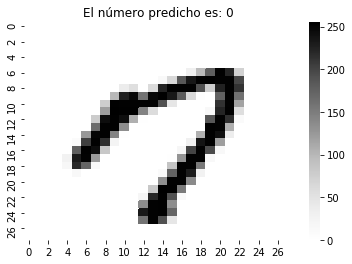

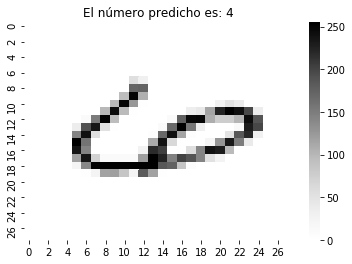

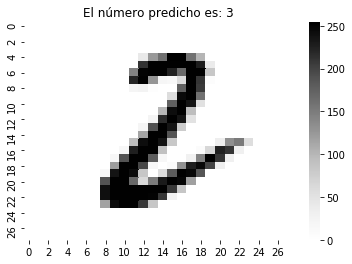

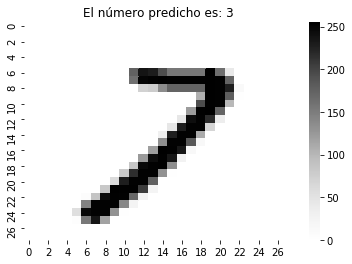

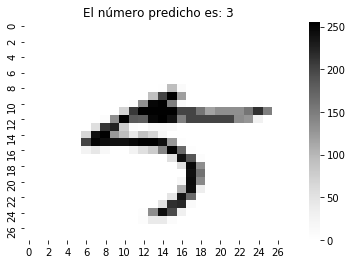

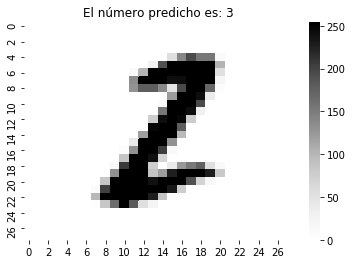

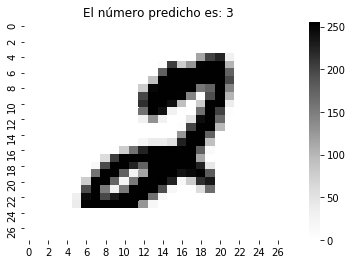

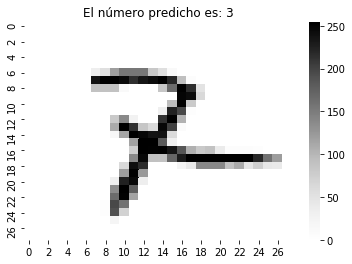

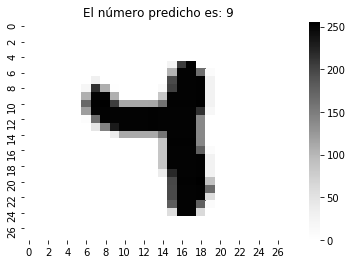

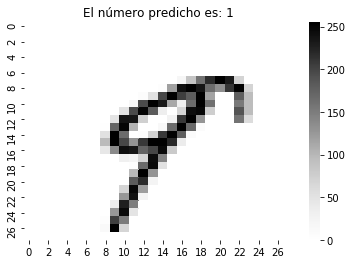

In [0]:
from tensorflow.keras.models import load_model

model = load_model("models/model1.h5")

oh_yp = model.predict(X)

yp = [np.argmax(oh_) for oh_ in oh_yp]

misses = 0

for i, _ in enumerate(X):
  if yp[i] != Y[i]: 
    misses += 1
    plt.title("El número predicho es: {}".format(yp[i]))
    sb.heatmap(X[i].reshape(28, 28), cmap="Greys")
    plt.show()
    
  if misses == 10:
    break
